In [1]:
edad<-c(2,3,3,3,2,1,2,2,3,2,1,1,2,3,3,1,3,3,2,1)
sexo<-c(1,2,1,2,1,1,1,2,1,2,2,1,2,2,1,2,2,1,2,1)
esco<-c(2,1,4,2,1,1,2,2,3,4,3,2,2,2,4,2,3,1,2,3)
econ<-c(2,2,2,2,2,1,2,2,3,2,3,3,2,2,3,2,2,1,1,2)
vvda<-c(1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,1,1,2,2,1)

In [2]:
edad<-factor(edad, labels = c("joven","adulto","anciano"))
sexo<-factor(sexo, labels = c("masculino","femenino"))
esco<-factor(esco, labels = c("primaria","secundaria","universitaria","otra"))
econ<-factor(econ, labels = c("bajo","medio","alto"))
vvda<-factor(vvda, labels = c("si","no"))
datos<-data.frame(edad,sexo,esco,econ,vvda)

In [3]:
datos

edad,sexo,esco,econ,vvda
<fct>,<fct>,<fct>,<fct>,<fct>
adulto,masculino,secundaria,medio,si
anciano,femenino,primaria,medio,si
anciano,masculino,otra,medio,si
anciano,femenino,secundaria,medio,si
adulto,masculino,primaria,medio,si
joven,masculino,primaria,bajo,no
adulto,masculino,secundaria,medio,no
adulto,femenino,secundaria,medio,si
anciano,masculino,universitaria,alto,si


In [6]:
install.packages('ca')

Installing package into 'C:/Users/cizai/OneDrive/Documentos/R/win-library/3.6'
(as 'lib' is unspecified)



package 'ca' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cizai\AppData\Local\Temp\RtmpcVvOHv\downloaded_packages


In [7]:
library(ca)

Warning message:
"package 'ca' was built under R version 3.6.3"


In [8]:
acm<-mjca(datos,lambda="indicator",supcol=5,nd=NA)

In [9]:
summary(acm)


Principal inertias (eigenvalues):

 dim    value      %   cum%   scree plot               
 1      0.477715  23.9  23.9  ******                   
 2      0.402491  20.1  44.0  *****                    
 3      0.333171  16.7  60.7  ****                     
 4      0.250134  12.5  73.2  ***                      
 5      0.170013   8.5  81.7  **                       
 6      0.144391   7.2  88.9  **                       
 7      0.130371   6.5  95.4  **                       
 8      0.091713   4.6 100.0  *                        
        -------- -----                                 
 Total: 2.000000 100.0                                 


Columns:
                   name   mass  qlt  inr     k=1 cor  ctr     k=2 cor  ctr  
1  |         edad:joven |   62  226   91 |  -823 226   89 |    17   0    0 |
2  |        edad:adulto |   88  530   86 |   988 526  179 |   -87   4    2 |
3  |       edad:anciano |  100   85   66 |  -350  82   26 |    66   3    1 |
4  |     sexo:masculino |  12

In [10]:
acm$sv

[1] 0.6911695 0.6344214 0.5772100 0.5001344 0.4123260 0.3799887 0.3610689
[8] 0.3028423

In [11]:
sacm=summary(acm)

In [16]:
cbind(sacm$columns[,c(1)],sacm$columns[,c(5,8,6,9)]/1000)

,"sacm$columns[, c(1)]",k=1,k=2,cor,cor.1
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,edad:joven,-0.823,0.017,0.226,0.000
2,edad:adulto,0.988,-0.087,0.526,0.004
3,edad:anciano,-0.350,0.066,0.082,0.003
4,sexo:masculino,-0.507,-0.376,0.257,0.141
5,sexo:femenino,0.507,0.376,0.257,0.141
6,esco:primaria,-0.259,-1.686,0.017,0.710
7,esco:secundaria,0.717,0.218,0.421,0.039
8,esco:universitaria,-1.166,0.850,0.340,0.180
9,esco:otra,-0.252,0.460,0.011,0.037


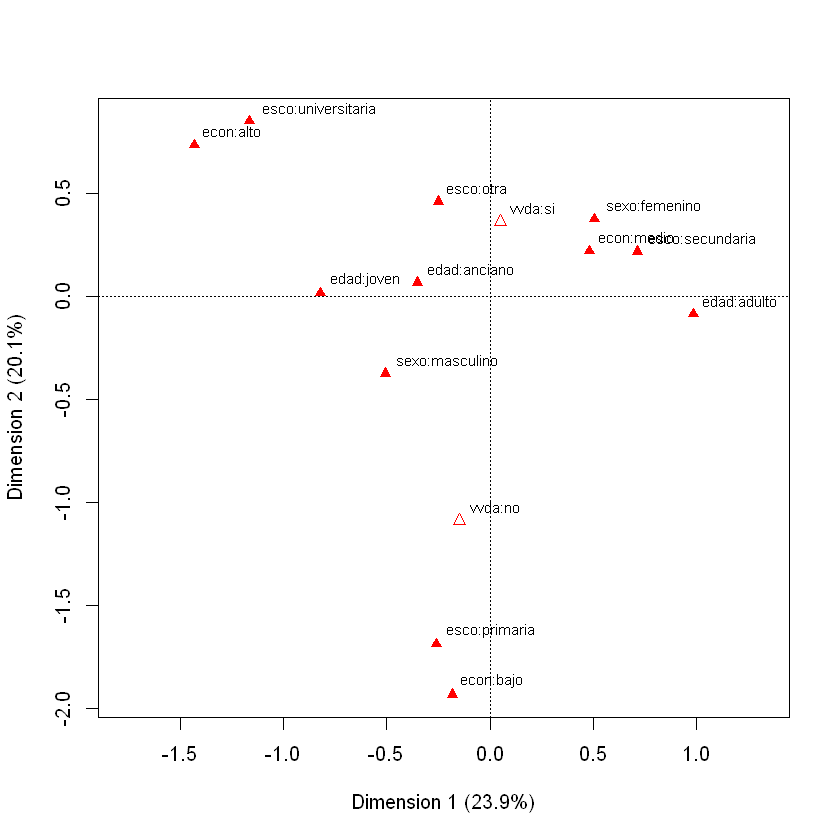

In [20]:
plot(acm)

In [17]:
acm$Burt

,edad:joven,edad:adulto,edad:anciano,sexo:masculino,sexo:femenino,esco:primaria,esco:secundaria,esco:universitaria,esco:otra,econ:bajo,econ:medio,econ:alto,vvda:si,vvda:no
edad:joven,5,0,0,3,2,1,2,2,0,1,2,2,3,2
edad:adulto,0,7,0,3,4,1,5,0,1,1,6,0,5,2
edad:anciano,0,0,8,4,4,2,2,2,2,1,5,2,7,1
sexo:masculino,3,3,4,10,0,3,3,2,2,2,5,3,6,4
sexo:femenino,2,4,4,0,10,1,6,2,1,1,8,1,9,1
esco:primaria,1,1,2,3,1,4,0,0,0,2,2,0,2,2
esco:secundaria,2,5,2,3,6,0,9,0,0,1,7,1,6,3
esco:universitaria,2,0,2,2,2,0,0,4,0,0,2,2,4,0
esco:otra,0,1,2,2,1,0,0,0,3,0,2,1,3,0
econ:bajo,1,1,1,2,1,2,1,0,0,3,0,0,0,3
